In [16]:
## LINKS
## Column Info: https://biostat.app.vumc.org/wiki/pub/Main/DataSets/Cdiabetes.html
## Data: https://biostat.app.vumc.org/wiki/pub/Main/DataSets/diabetes.html
## Other Data Sets: https://biostat.app.vumc.org/wiki/Main/DataSets

In [17]:
import pandas as pd
from pandas import DataFrame
import os
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from matplotlib import pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.cluster import KMeans

In [18]:
plt.rcParams["font.size"] = 16

In [19]:
url = "https://biostat.app.vumc.org/wiki/pub/Main/DataSets/diabetes.csv"
if not os.path.exists("diabetes.csv"):
    print("DOWNLOAD")
    df = pd.read_csv(url)
    df.to_csv("diabetes.csv", index=False)

df = pd.read_csv("diabetes.csv")
print(df.shape)
df.head()

(403, 19)


,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [20]:
df["diabetes"] = (df["glyhb"] > 7.0)

df["waist_hip"] = df["waist"] / df["hip"]
df["weight_height"] = df["height"] / df["weight"]

df = df.dropna()
df

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,...,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,diabetes,waist_hip,weight_height
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,...,190.0,92.0,185.0,92.0,49.0,57.0,180.0,False,0.859649,0.238281
6,1011,195.0,92,41.0,4.8,4.840000,Buckingham,30,male,69.0,...,161.0,112.0,161.0,112.0,46.0,49.0,720.0,False,0.938776,0.361257
8,1016,177.0,87,49.0,3.6,4.840000,Buckingham,45,male,69.0,...,160.0,80.0,128.0,86.0,34.0,40.0,300.0,False,0.850000,0.415663
10,1024,242.0,82,54.0,4.5,4.770000,Louisa,60,female,65.0,...,130.0,90.0,130.0,90.0,39.0,45.0,300.0,False,0.866667,0.416667
15,1036,213.0,83,47.0,4.5,3.410000,Louisa,33,female,65.0,...,130.0,90.0,120.0,96.0,37.0,41.0,240.0,False,0.902439,0.414013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,41254,169.0,104,58.0,2.9,4.820000,Louisa,25,female,60.0,...,140.0,95.0,130.0,94.0,40.0,42.0,60.0,False,0.952381,0.389610
395,41500,179.0,85,50.0,3.6,4.990000,Louisa,37,male,66.0,...,190.0,94.0,172.0,100.0,33.0,39.0,480.0,False,0.846154,0.485294
397,41503,301.0,90,118.0,2.6,4.280000,Louisa,89,female,61.0,...,218.0,90.0,238.0,90.0,31.0,41.0,210.0,False,0.756098,0.530435
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,...,138.0,94.0,130.0,94.0,35.0,39.0,210.0,True,0.897436,0.398844


In [21]:
df[df["ratio"]==19.2999992371]

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,...,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,diabetes,waist_hip,weight_height
62,2778,443.0,185,23.0,19.299999,14.31,Buckingham,51,female,70.0,...,158.0,98.0,148.0,88.0,43.0,48.0,420.0,True,0.895833,0.297872


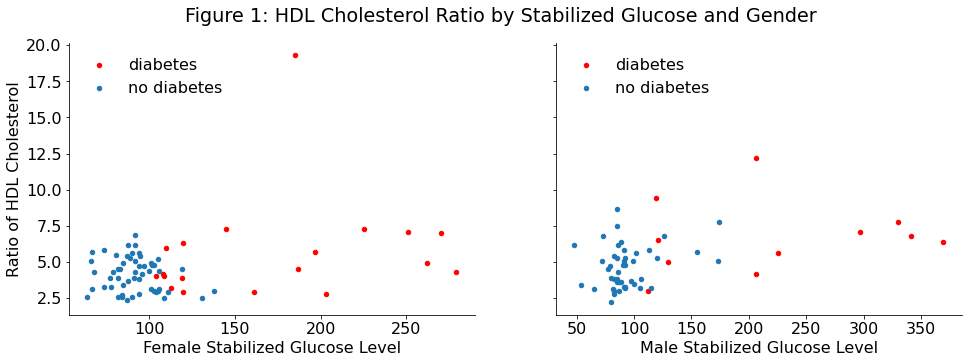

In [22]:
diabetes = df[df["diabetes"]==True]
diabetes_f = diabetes[diabetes["gender"] == "female"]
diabetes_m = diabetes[diabetes["gender"] == "male"]
no_diabetes = df[df["diabetes"]==False]
no_diabetes_f = no_diabetes[no_diabetes["gender"] == "female"]
no_diabetes_m = no_diabetes[no_diabetes["gender"] == "male"]


fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(16,5))
fig.suptitle("Figure 1: HDL Cholesterol Ratio by Stabilized Glucose and Gender")


diabetes_f.plot.scatter(ax=axs[0], x="stab.glu",y="ratio", color="red", label="diabetes")
no_diabetes_f.plot.scatter(ax=axs[0], x="stab.glu",y="ratio", label="no diabetes")
axs[0].set_ylabel("Ratio of HDL Cholesterol")
axs[0].set_xlabel("Female Stabilized Glucose Level")
axs[0].legend(loc='upper left', frameon=False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

diabetes_m.plot.scatter(ax=axs[1], x="stab.glu",y="ratio", color="red", label="diabetes")
no_diabetes_m.plot.scatter(ax=axs[1], x="stab.glu",y="ratio", label="no diabetes")
axs[1].set_xlabel("Male Stabilized Glucose Level")
axs[1].legend(loc='upper left', frameon=False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

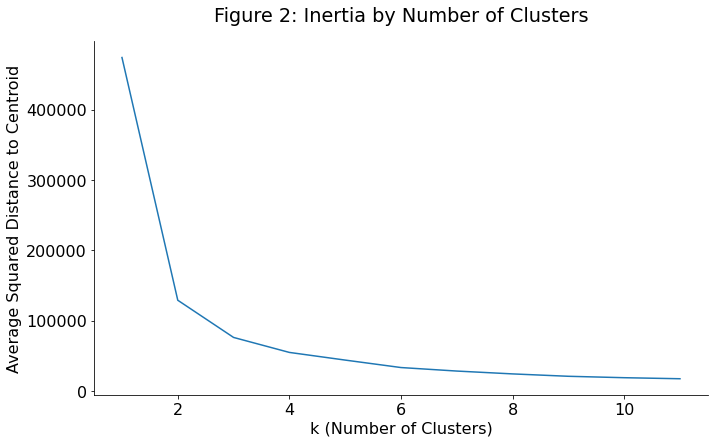

In [23]:
features_no_gender = ["age", "waist_hip", "stab.glu", "weight_height", "ratio"]
scores = pd.Series(dtype=float)

for k in range(1, 12):
    km = KMeans(n_clusters=k)
    km.fit(df[features_no_gender])
    scores.loc[k] = km.inertia_
    
ax = scores.plot.line(figsize=(11,6.5))
ax.set_xlabel("k (Number of Clusters)")
ax.set_ylabel("Average Squared Distance to Centroid")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Figure 2: Inertia by Number of Clusters", pad=20)
None

In [24]:
scores

1     474038.174333
2     128966.181767
3      76069.245226
4      54771.950691
5      43877.299666
6      33270.889807
7      28276.038753
8      24227.789402
9      20843.809965
10     18825.234482
11     17354.401342
dtype: float64

In [25]:
train, test = train_test_split(df, random_state=0)

In [42]:
features = ["age", "waist_hip", "stab.glu", "weight_height", "ratio", "gender"]

pipe = Pipeline([
    ("transformations", make_column_transformer((OneHotEncoder(), ["gender"]),
                                    remainder = "passthrough")),
    ("lr", LogisticRegression())
])

pipe.fit(train[features], train["diabetes"])
print(pipe.score(test[features], test["diabetes"]))
print(pipe["lr"].coef_.reshape(-1))
print(pipe["lr"].n_features_in_)

oh = OneHotEncoder()
oh.fit(np.array(train["gender"]).reshape(-1, 1))
oh.get_feature_names() # Female is the first coef

0.8787878787878788
[ 0.41723719 -0.41878438  0.03213109  0.11038715  0.05291344 -0.11157753
 -0.00885004]
7


array(['x0_female', 'x0_male'], dtype=object)

In [43]:
train # female is also the first row

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,...,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,diabetes,waist_hip,weight_height
239,17760,260.0,68,60.0,4.3,4.78,Buckingham,69,female,59.0,...,158.0,98.0,159.0,80.0,45.0,48.0,180.0,False,0.937500,0.329609
259,17814,224.0,85,30.0,7.5,5.26,Buckingham,36,male,69.0,...,150.0,99.0,130.0,80.0,37.0,41.0,360.0,False,0.902439,0.336585
163,15016,190.0,92,44.0,4.3,4.66,Louisa,27,female,65.0,...,150.0,106.0,160.0,116.0,39.0,47.0,60.0,False,0.829787,0.309524
49,2753,157.0,74,47.0,3.3,5.57,Buckingham,55,female,66.0,...,150.0,82.0,142.0,78.0,43.0,52.0,360.0,False,0.826923,0.301370
304,20343,160.0,82,41.0,3.9,2.85,Louisa,30,female,63.0,...,172.0,124.0,176.0,124.0,33.0,40.0,30.0,False,0.825000,0.440559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,41063,270.0,73,40.0,6.8,3.58,Louisa,42,male,66.0,...,146.0,94.0,149.0,94.0,39.0,41.0,30.0,False,0.951220,0.356757
223,15821,240.0,96,57.0,4.2,5.74,Buckingham,54,female,65.0,...,152.0,100.0,140.0,100.0,37.0,43.0,60.0,False,0.860465,0.371429
205,15782,207.0,77,46.0,4.5,4.82,Buckingham,68,male,55.0,...,199.0,115.0,190.0,99.0,29.0,33.0,120.0,False,0.878788,0.423077
376,41001,227.0,85,26.0,8.7,4.98,Louisa,58,male,70.0,...,144.0,82.0,144.0,80.0,38.0,43.0,480.0,False,0.883721,0.331754


In [27]:
actual = np.array(test["diabetes"])
predicted =  pipe.predict(test[features])
confusion_matrix(actual, predicted)
#print(recall_score(actual, predicted, average=None, labels=[False, True]))
#precision_score(actual, predicted, average=None, labels=[False, True])

array([[24,  0],
       [ 4,  5]])

In [44]:
features_labaled = ["age", "waist/hip", "stabilized glucose", "weight/height",
                    "ratio", "gender (female)", "gender (male)"]

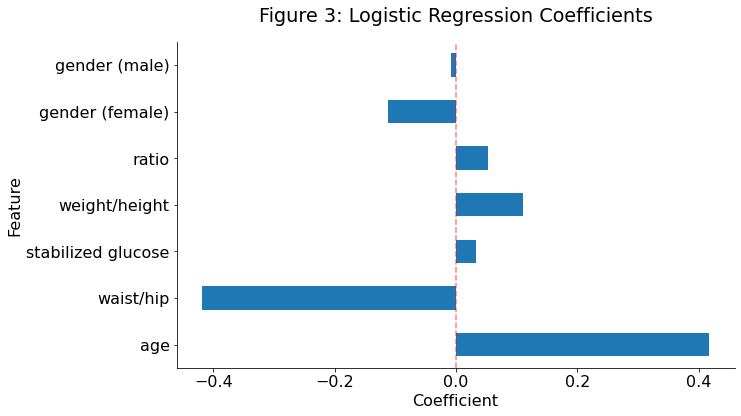

In [45]:
ax = pd.Series(pipe["lr"].coef_.reshape(-1), index=features_labaled).plot.barh(figsize=(10,6))
plt.axvline(x=0, color="red", alpha=0.5, linestyle="--")
ax.set_xlabel("Coefficient")
ax.set_ylabel("Feature")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Figure 3: Logistic Regression Coefficients", pad=20)
None